In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [89]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# Data Insights and Visualization

In [90]:
df.shape

(42, 2)

In [91]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [93]:
df.isna().sum()

Quarter    0
Sales      0
dtype: int64

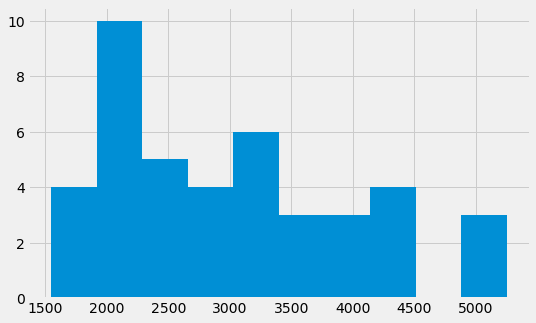

In [94]:
plt.axes()

df['Sales'].hist(figsize = (8,5))

plt.show()

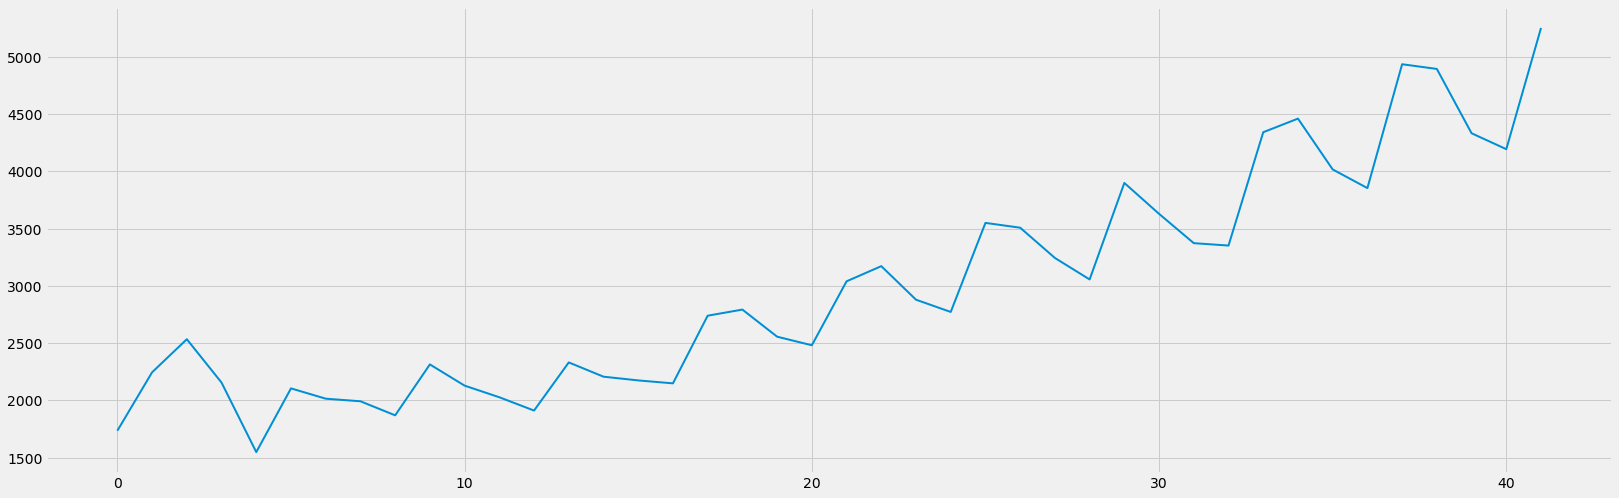

In [95]:
plt.figure(figsize = (25,8))
plt.axes()
plt.plot(df['Sales'], linewidth = 2)
plt.show()

<AxesSubplot:>

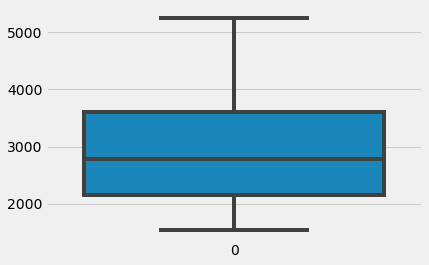

In [96]:
sns.boxplot(data=df['Sales'])

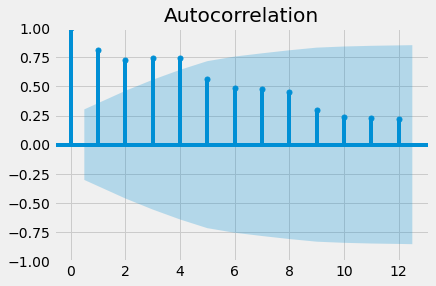

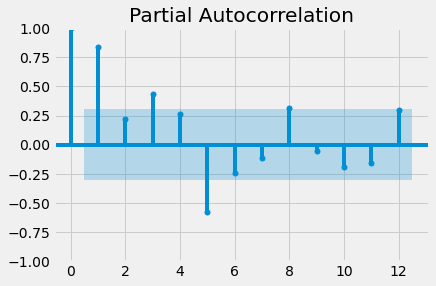

In [97]:
tsa_plots.plot_acf(df['Sales'],lags = 12)

tsa_plots.plot_pacf(df['Sales'],lags = 12)

plt.show()

# Time series decomposition plot

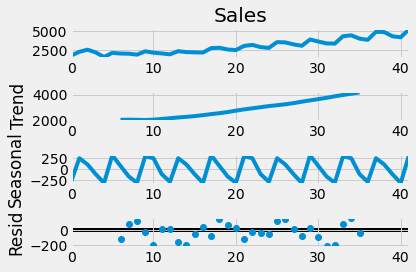

In [98]:
ts_decompose = seasonal_decompose(df.Sales,period = 12)
ts_decompose.plot()
plt.show()

# Time series forecasting with ARIMA

In [99]:
X = df['Sales'].values

In [100]:
size = int(len(X) * 0.66)

In [101]:
train, test = X[0:size], X[size:len(X)]

In [102]:
from statsmodels.tsa.arima.model import ARIMA

In [103]:
model = ARIMA(train, order=(5,1,0))

In [104]:
model_fit = model.fit()

In [105]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Mon, 20 Feb 2023   AIC                            360.163
Time:                        08:42:29   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

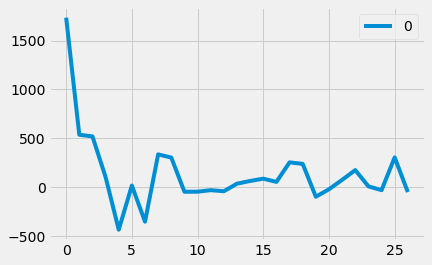

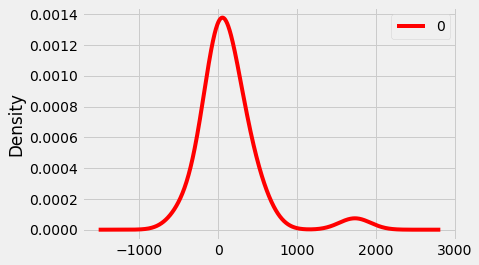

                 0
count    27.000000
mean    137.791853
std     385.970462
min    -433.659591
25%     -34.938861
50%      55.067400
75%     247.080157
max    1734.827000


In [106]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde',color='red')
pyplot.show()
print(residuals.describe())

### Rolling Forecast ARIMA Model

In [107]:
history = [x for x in train]

In [108]:
predictions = list()

In [109]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3130.132570, expected=3243.859993
predicted=3167.315970, expected=3056.000000
predicted=3717.472606, expected=3899.000000
predicted=3775.837495, expected=3629.000000
predicted=3332.727871, expected=3373.000000
predicted=3258.576338, expected=3352.000000
predicted=4081.006046, expected=4342.000000
predicted=3955.786233, expected=4461.000000
predicted=4146.277853, expected=4017.000000
predicted=3958.436761, expected=3854.000000
predicted=4701.652911, expected=4936.000000
predicted=4990.072284, expected=4895.000000
predicted=4390.352783, expected=4333.000000
predicted=4190.807855, expected=4194.000000
predicted=5176.909532, expected=5253.000000


In [110]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 34280.908


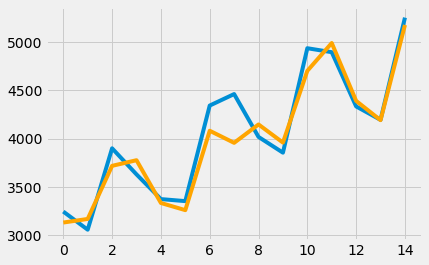

In [111]:
pyplot.plot(test)
pyplot.plot(predictions, color='orange')
pyplot.show()

expected values - blue\
rolling forecast predictions - yellow

# Multiple Models

In [112]:
df2 = pd.get_dummies(df, columns = ['Quarter'])

In [113]:
df2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [114]:
df2.head().T

,0,1,2,3,4
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,1.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000


In [115]:
t= np.arange(1,43)

In [116]:
df2['t'] = t

In [117]:
df2['t_sq'] = df2['t']*df2['t']

In [118]:
log_Sales=np.log(df2['Sales'])

In [119]:
df2['log_Sales']=log_Sales

In [120]:
df2.head().T

,0,1,2,3,4
Sales,1734.827000,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,1.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000


# Evaluation Metric RMS

In [121]:
def RMSE(org, pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [122]:
# Splitting the data
train1, test1 = np.split(df2, [int(.67 *len(df2))])

### Linear model

In [123]:
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=RMSE(test1['Sales'], predlin)
rmselin

750.4020694454623

### Quadratic model

In [124]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=RMSE(test1['Sales'], predquad)
rmsequad

783.7297975037103

### Exponential model

In [125]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=RMSE(test1['Sales'], predexp)
rmseexpo

4152.488855796471

### Additive seasonality model

In [126]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=RMSE(test1['Sales'], predadd)
rmseadd

1869.7188209186947

### Additive Linear seasonality model

In [127]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=RMSE(test1['Sales'], predaddlinear)
rmseaddlinear

596.1526282372472

### Additive Quadratic model

In [128]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=RMSE(test1['Sales'], rmseaddlinear)
rmseaddquad

3572.281168392929

### Multiple seasonality model

In [129]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= RMSE(test1['Sales'], predmul)
rmsemul

4153.198068515678

### Multiple linear seasonality model

In [130]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=RMSE(test1['Sales'], predmullin)
rmsemulin

4151.624621406226

### Multiple Quadratic seasonality model

In [131]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=RMSE(test1['Sales'], pred_mul_quad)
rmse_mul_quad

4154.748058198833

In [132]:
table = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'RMSE Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}


In [133]:
Table=pd.DataFrame(table)
print(Table)

           Model  RMSE Values
0  rmse_mul_quad  4154.748058
1        rmseadd  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad  3572.281168
4       rmseexpo  4152.488856
5        rmselin   750.402069
6        rmsemul  4153.198069
7      rmsemulin  4151.624621
8       rmsequad   783.729798


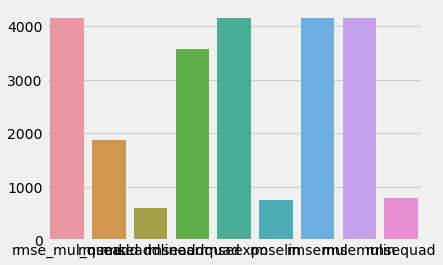

<Figure size 7200x3600 with 0 Axes>

In [134]:
sns.barplot(data = table,x = 'Model',y = 'RMSE Values')
plt.figure(figsize=(100, 50))
plt.show()

Additive Linear seasonality model has the lowest RSME value. Hence, will be used for Final Model Building

In [135]:
predaddlinear

28    3308.618747
29    3372.483355
30    3436.347964
31    3500.212572
32    3564.077181
33    3627.941790
34    3691.806398
35    3755.671007
36    3819.535615
37    3883.400224
38    3947.264832
39    4011.129441
40    4074.994050
41    4138.858658
dtype: float64

## End